In [1]:
%%capture
# DO NOT EDIT THIS NOTEBOOK
# It generates a report to verify your submission
import logging, sys, os
logging.disable(sys.maxsize)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import solution
import time
start_verify = time.time()
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,3)

In [2]:
%matplotlib inline
import os
import pickle
import pandas as pd
import numpy as np
import pydot
from tensorflow.keras.utils import plot_model
from IPython.display import Image
import inspect
from IPython.core import page
page.page = print

grades = []

def shout(text, verbose=1):
    """ Prints text in red. Just for fun.
    """
    if verbose>0:
        print('\033[91m'+text+'\x1b[0m')
        
def printSource(obj):
    print(''.join(str(x) for x in inspect.getsourcelines(obj)[0]))
        
# Helper function to extract min/max from the learning curves
def minMax(x):
    return pd.Series(index=['min','max'],data=[x.min(),x.max()])

def print_answer(ans):
    output = ""
    for line in ans.splitlines()[1:]:
        output += line.strip() + " "
    output += "(length: "+str(len(output))+")\n"
    print(output)
        
def run_evaluation(name, model_builder, data, base_dir, target_dir, train=True, 
                   generator=False, epochs=3, batch_size=32, steps_per_epoch=60, 
                   verbose=1, print_model=True, **kwargs):
    """ Trains and evaluates the given model on the predefined train and test splits,
    stores the trained model and learning curves. Also prints out a summary of the 
    model and plots the learning curves.
    Keyword arguments:
    name -- the name of the model to be stored, e.g. 'question_1_1.h5'
    model_builder -- function that returns an (untrained) model. The model must 
                     have a 'fit' function that follows the Keras API. It can wrap
                     a non-Keras model as long as the 'fit' function takes the 
                     same attributes and returns the learning curves (history).
                     It also must have a 'summary' function that prints out a 
                     model summary, and a 'save' function that saves the model 
                     to disk. 
    data -- data split for evaluation. A tuple of either:
            * Numpy arrays (X_train, X_val, y_train, y_val)
            * A data generator and validation data (generator, X_val, y_val)
    base_dir -- the directory to save or read models to/from
    train -- whether or not the data should be trained. If False, the trained model
             will be loaded from disk.
    generator -- whether the data in given as a generator or not
    epochs -- the number of epochs to train for
    batch_size -- the batch size to train with
    steps_per_epoch -- steps per epoch, in case a generator is used (ignored otherwise)
    verbose -- verbosity level, 0: silent, 1: minimal,...
    kwargs -- keyword arguments that should be passed to model_builder.
              Not required, but may help you to adjust its behavior
    """
    model = model_builder(**kwargs)
    if not model:
        shout("No model is returned by the model_builder")
        grades.append("0")
        return
    if not hasattr(model, 'fit'):
        shout("Model is not built correctly")
        return
    learning_curves = {}
    if train and not stop_training: # Train anew
        shout("Model not trained? Skipping.", verbose)
    else: # Load from file
        model = solution.load_model_from_file(base_dir, name)
        if not model:
            shout("Model not found")
            return
        learning_curves = None
        try:
            learning_curves = pickle.load(open(os.path.join(base_dir, name+'.p'), "rb"))
        except FileNotFoundError:
            shout("Learning curves not found")
            return
    # Report
    lc = pd.DataFrame(learning_curves)
    print("Max val score: {:.2f}%".format(lc.iloc[:,3].max()*100))
    grades.append("{:.2f}".format(lc.iloc[:,3].max()*100))
    lc.plot(lw=2,style=['b:','r:','b-','r-']);
    plt.xlabel('epochs');
    plt.show()
    
    if print_model:
        print(model.summary())
    plot_model(model, to_file=os.path.join(target_dir,name+'.png'), show_shapes=True, show_layer_names=False)
        
import pprint
pp = pprint.PrettyPrinter(indent=4)

### Web Information Retrieval and Data Mining - Assignment 3

In [3]:
grades.append(solution.target_dir.split(os.sep)[-1])
grades.append(solution.your_name)
print("Student: {0} ({1})".format(solution.your_name,solution.student_id))

Student: Agrawal, Mitali (1480902)


#### Answer 1.1, Baseline (4p)
- Dense network, at least 3 layers, shaped like a pyramid
    - Last layer: 10 nodes, sigmoid. 
    - Loss: categorical cross-entropy. Metric: accuracy
- No preprocessing, regularization. Get at least 70% accuracy.
- Explain design decisions. Discuss performance.
    - Does it overfit (large/growing gap between loss and val_loss)?

The ReLU reduces the likelihood of the gradient to vanish. It does not activate all the neurons at the same time. Since, the problem demands the multi class classifier hence we use softmax. We keep the softmax function at the last layer. Softmax almost work like max layer as well as it will be differentiable to train by gradient descent. We observe that as the learning rate decreases, the accuracy of the classifier improves. The performance of the model is resonably good, the accuracy is 0.85 while the validation accuracy is 0.83.  (length: 538)



Max val score: 85.59%


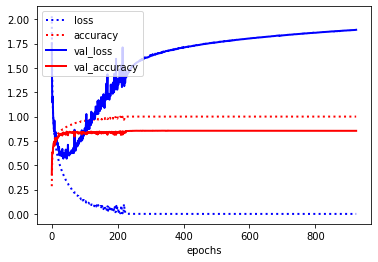

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_12 (Reshape)         (None, 3072)              0         
_________________________________________________________________
dense_53 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dense_54 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_55 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_56 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_57 (Dense)             (None, 10)                650       
Total params: 1,746,506
Trainable params: 1,746,506
Non-trainable params: 0
___________________________________________

def build_model_1_1():
    model_1_1 = models.Sequential()
    model_1_1.add(layers.Reshape((3072,), input_shape=(32,32,3)))
    model_1_1.add(layers.Dense(512, activation='relu'))
    model_1_1.add(layers.Dense(256, activation='relu'))
    model_1_1.add(layers.Dense(128, activation='relu'))
    model_1_1.add(layers.Dense(64, activation='relu'))
    model_1_1.add(layers.Dense(10, activation='softmax'))

    model_1_1.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
    return model_1_1



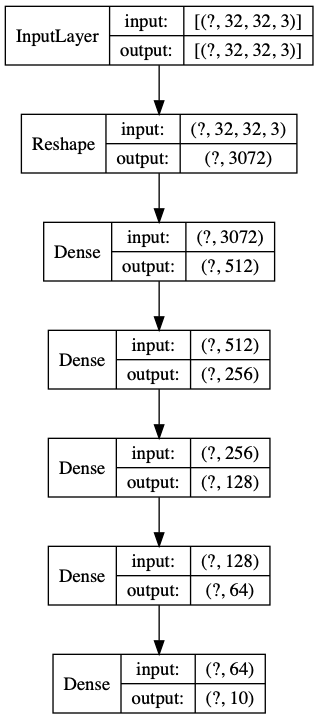

In [4]:
print_answer(solution.answer_q_1_1)
run_evaluation("model_1_1", solution.build_model_1_1, solution.evaluation_split, solution.base_dir, 
               solution.target_dir, train=False)
%psource solution.build_model_1_1
if os.path.exists(os.path.join(solution.target_dir,'model_1_1.png')):
    display(Image(os.path.join(solution.target_dir,'model_1_1.png'), width=200))

#### Answer 1.2, Preprocess (2p)
- Convert images to greyscale, other preprocessing optional.
    - Input shape should be (32,32,1)
- Explain design decisions. Is it better? Why (not)? 
    - Color information is likely not so useful for classification. Greyscale makes the network smaller, less parameters to learn, less likely to overfit.

 (length: 1)



Max val score: 64.16%


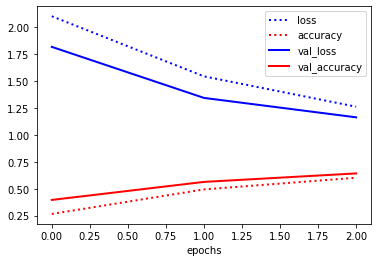

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_3 (Reshape)          (None, 1024)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_13 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_14 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_15 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_16 (Dense)             (None, 10)                650       
Total params: 697,930
Trainable params: 697,930
Non-trainable params: 0
________________________________________________

In [5]:
print_answer(solution.answer_q_1_2)
run_evaluation("model_1_2", solution.build_model_1_2, solution.evaluation_split, solution.base_dir, 
               solution.target_dir, train=False)
%psource solution.build_model_1_2

#### Answer 1.3, Tune (4p)
- Regularize the model. What works best? 
    - Should consider batch normalization, dropout, l1/l2 regularization (or Nesterov)
- Tune other hyperparameters (e.g. learning rate, batch size,...) as you see fit.
    - At least consider tuning learning rate, ideally also momentum, decay, other optimizers 
- Explain your findings and final design decisions. Discuss the results.
    - Should be better, at least it shouldn't overfit

The purpose of regularization the model to avoid overfitting. Results with combination of l1 and l2 regularization (with lambda= 0.0001) is better than the l1 regularization(with lambda= 0.001). The dropout of neurons after each layer did not improve the accuracy.  (length: 266)



Max val score: 79.15%


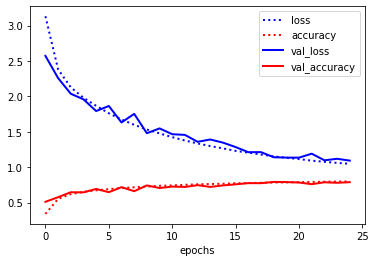

def build_model_1_3():
    model_1_3 = models.Sequential()
    model_1_3.add(layers.Reshape((1024,), input_shape=(32,32,1)))
    model_1_3.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l1(0.0001)))    
    model_1_3.add(layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
    model_1_3.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l1(0.0001)))
    model_1_3.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l1(0.0001)))
    model_1_3.add(layers.Dense(10, activation='softmax', kernel_regularizer=regularizers.l1(0.0001)))
    model_1_3.compile(optimizer= optimizers.RMSprop(lr= 0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model_1_3
    pass



In [6]:
print_answer(solution.answer_q_1_3)
run_evaluation("model_1_3", solution.build_model_1_3, solution.evaluation_split, solution.base_dir, 
               solution.target_dir, train=False, print_model=False)
%psource solution.build_model_1_3

#### Answer 2.1, ConvNet (7p)
- Build a sequential ConvNet, get at least 90% accuracy.
    - Conv2D layers, input shape (32,32,1)
    - Consider using blocks of Conv2D layers with maxpooling in between
    - Use zero-padding in Conv2D layers because the images are small
    - At least one dense hidden layer and dense output layer (sigmoid)
    - Consider adding batch normalization, dropout
    - Consider small dropout rates in beginning, larger dropout rates later in network
    - Consider other optimizers and tuning learning rate, momentum,...
- Explain what you did and why (800 chars). Is it working well?
    - Should be quite elaborate and sensible

I have implemented four 'blocks' each, consisting two 2D-convolution layers first ehich is followed by 2D maxpooling and finally dropout. The first layer Conv2D uses it's kernel to extract all the spatial features from the data. If we see carefully, ReLU does not activate all the neurons at the same time. Hence ReLU performed relatively fast as compared to other things. The main idea is to use multiple convolutional layers to learn patterns. This learning is done at all the different levels of abstraction. Then MaxPooling was used which does two things. It increases the translation invariance and reduces the resolution, which are both necessary. Performance wise, the convolution layers performed very good. Unfortunately, there the model was overfitting. Hence, dropout of 0.6, 0.3 and 0.05 was observed. The best performance found is on lambda 0.3. The accuracy is very high with ~94%. Another goo thing to notice is that there is very small difference in accuracy and val_accuracy. With th

Max val score: 93.84%


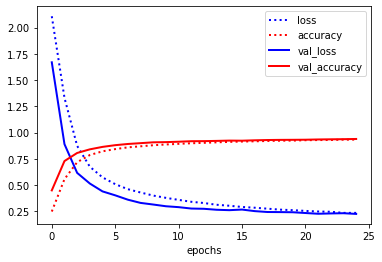

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 16)        160       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 32, 32, 16)        2320      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 16, 16, 32)        4640      
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 32)        

def build_model_2_1():
    model_2_1 = models.Sequential()
    model_2_1.add(layers.Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 1)))
    model_2_1.add(layers.Conv2D(16, (3, 3), activation='relu', padding='same'))
    model_2_1.add(layers.MaxPooling2D((2, 2)))
    model_2_1.add(layers.Dropout(0.3))
    model_2_1.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
    model_2_1.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
    model_2_1.add(layers.MaxPooling2D((2, 2)))
    model_2_1.add(layers.Dropout(0.3))
    model_2_1.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model_2_1.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model_2_1.add(layers.MaxPooling2D((2, 2)))
    model_2_1.add(layers.Dropout(0.3))
    model_2_1.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model_2_1.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model_2_1.ad

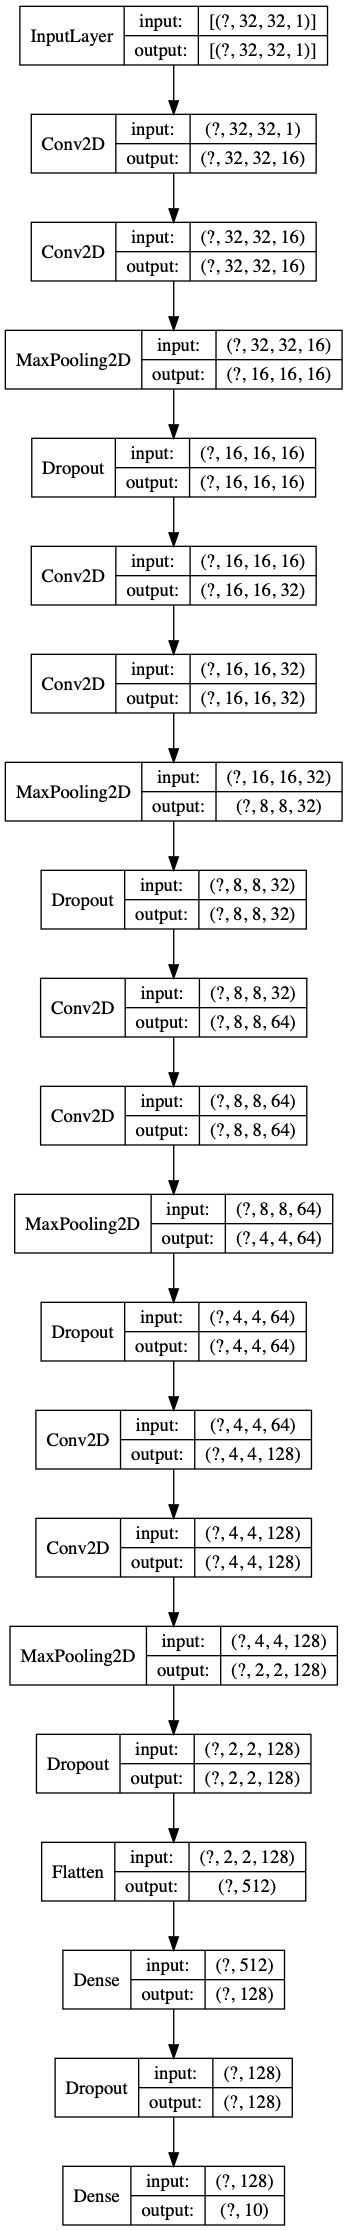

In [7]:
print_answer(solution.answer_q_2_1)
run_evaluation("model_2_1", solution.build_model_2_1, solution.evaluation_split, solution.base_dir, 
               solution.target_dir, train=False)
%psource solution.build_model_2_1
if os.path.exists(os.path.join(solution.target_dir,'model_2_1.png')):
    display(Image(os.path.join(solution.target_dir,'model_2_1.png'), width=200))

#### Answer 2.2, Data Augmentation (3p)
- Augment the preprocessed training data.
    - Use small variations (small shifts up-down, left-right) of flips becasue the images are small
    - Large shifts and rotations distort the image too much
- Explain what you did and why. Discuss the performance of the model.

After the Visual inspection, I saw that some of the images are slightly tilted over the axis. Some images were also shifted towards the left or right. This means alignment is not correct and to fix it, the images are being rotated and shifted for better performance and results. Although this is important, it did not seem to reflect significantly on the accuracy of the model made. The accuracy score is coming out to be 0.942 and the val accuracy is 0.946, again with low difference which is good. When I compared it with the preprocessed data as explained above, it did improve the score a bit, but was not as significant as expected. The new model made is essentially the same, as the base of the previous model is used with little change in shape.  (length: 754)



Max val score: 94.15%


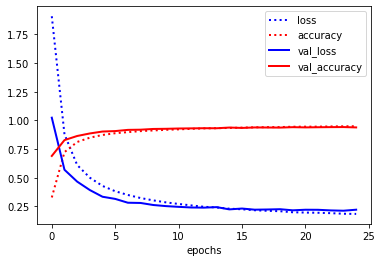

In [8]:
print_answer(solution.answer_q_2_2)
run_evaluation("model_2_2", solution.build_model_2_1, solution.augmented_split, solution.base_dir, 
               solution.target_dir, train=False, print_model=False)
print(solution.dg_code)

#### Answer 3.1, Misclassifications (2p)
- Report the test score (on the held-out test data)
    - Should be similar to score of previous model
- Plot confusion matrix, discuss which classes are often confused.
    - class 1 and 2 are most often confused
- Visualize the misclassifications in more depth by focusing on a single class
- Analyse which kinds of mistakes are made for that class.
    - Should contain some insight (e.g. misclassifications when the numbers are curly or noisy)

Since the model I made is designed only to classify single digits (per image), it performs poorly when asked to classify multiple digits in a single image input. Another problematic area was classification of 8. Whenever the model encounters the class of 8, it is usually misclassified as 6 or 0. Some misclassified images were because of the extremely poor quality of images. These were even hard to classify by human eye. Statistically, the highest number of missclassifications found was between 6 and 0 and between 3 and 0. Everything analyzed together, we can say that 0 is often being misclassified as other digit. (length: 621)

Test score: 0.94%


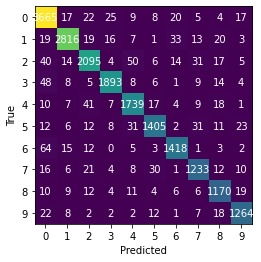

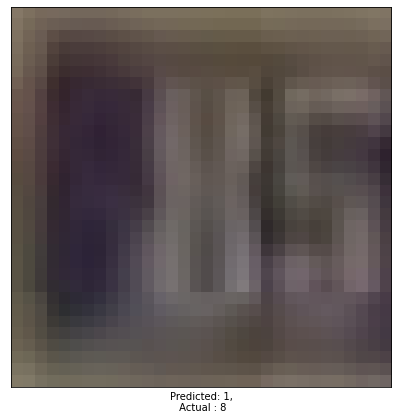

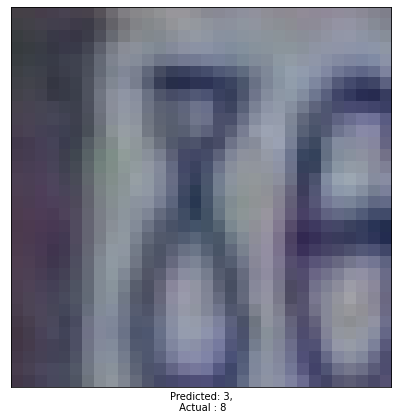

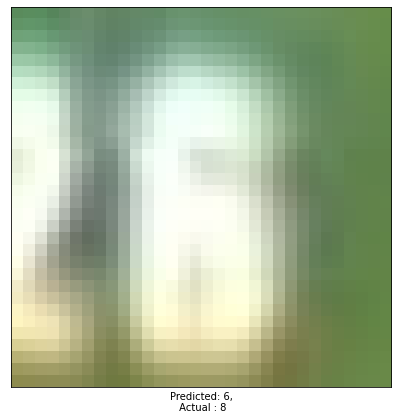

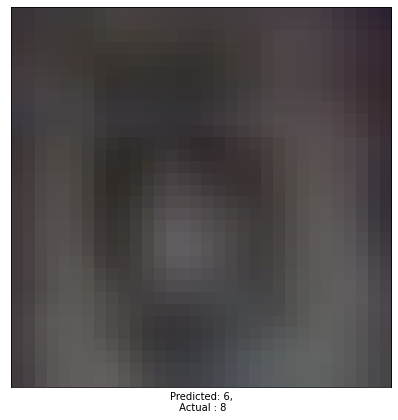

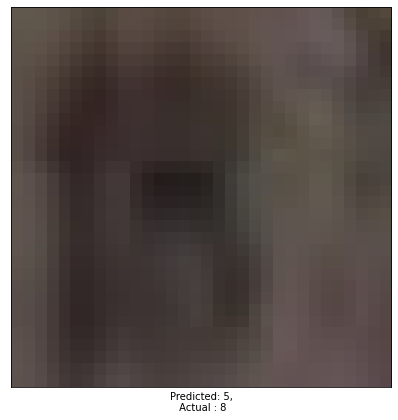

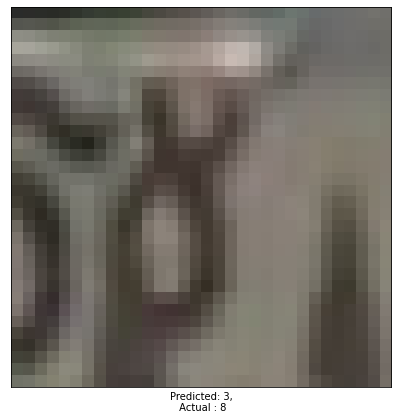

In [9]:
print_answer(solution.answer_q_3_1)
if hasattr(solution, 'test_accuracy_3_1'):
    try:
        print("Test score: {:.2f}%".format(solution.test_accuracy_3_1))
    except TypeError:
        print("Test score:",solution.test_accuracy_3_1)
else:
    print("Test score NOT FOUND: test_accuracy_3_1 missing")
try:
    solution.plot_confusion_matrix()
except:
    print("ERROR, could not build confusion matrix. Please check original report")
try:
    solution.plot_misclassifications()
except:
    print("ERROR, could not build misclassification plot. Please check original report")

#### Answer 3.2, Activations (4p)
- Retrieve and visualize the activations for one example
- For every filter for different convolutional layers (at different depths in the network).
- Give an explanation. Is your model indeed learning something useful?
    - Should detect edges etc in first layers, higher-order object (e.g. interesting regions) in deeper layers.

The first layer of the model, it learns about the edges of the digit and the very basic structure of inside of the digit. Towards the sixth layer, the output is much more detailed and precise. The model also learns that the structures that were being ignored in the initial layers are also important and hence prominent in the output. This makes the final output, more noisy than the first layer. (length: 397)



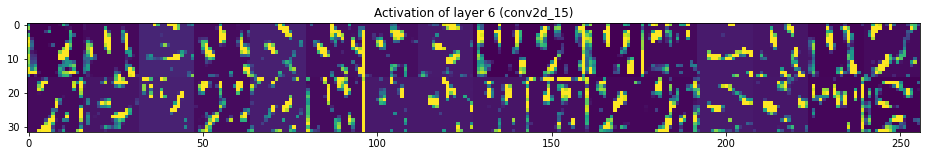

In [10]:
print_answer(solution.answer_q_3_2)
try:
    solution.plot_activations()
except:
    print("ERROR, could not build activation plot. Please check original report")

#### Answer 3.3, Class activation map (4p)
- Show a class activation map for your last convolutional layer
- Superimpose the activation map over the image, or plot side by side
    - Should make sense, detect interesting regions to classify the number

In [11]:
try:
    solution.plot_3_3()
except:
    print("ERROR, could not build class activation plot. Please check original report")
if hasattr(solution, 'plot_activation_map'):
    %psource solution.plot_activation_map
else:
    %psource solution.plot_3_3

def plot_activation_map():
    model_2_1 = load_model_from_file(base_dir, "model_2_1")
    layer_outputs = [layer.output for layer in model_2_1.layers[:15]]
    activation_model = models.Model(inputs= model_2_1.input, outputs=layer_outputs)
    activations = activation_model.predict(img_tensor)

    last_layer_activation = activations[13]
    f, ax2 = plt.subplots(1, 1, sharey=True)
    f, ax1 = plt.subplots(1, 1, sharey=True)
    
    ax1.imshow(X_train[7])
    ax2.matshow(last_layer_activation[0, :, :, 2], cmap='viridis')
    ax1.set_xlabel('Input image')
    ax2.set_xlabel('Last Convolutional Layer')
    pass



#### Answer 4.1, Fast feature extraction (5p)
- Import the VGG16 model, pretrained on ImageNet
- Freeze convolutional base, adds a dense layer
- Consider unfreezing the last few convolutional layers and evaluate whether that works better
    - Check if they do. It is very likely to help.
- Discuss the observed performance
    - Should get around 80% accuracy

Later when no layers are freezed the accuracy dropped to 0.18, which was very low and bad. When all the layers are freezed, the accuracy came out to be 0.1908. Hence, I then tried to freeze different convolution layers of the base. The accuracy of final model was much better than the previous freezed attempts. (length: 312)



Max val score: 55.79%


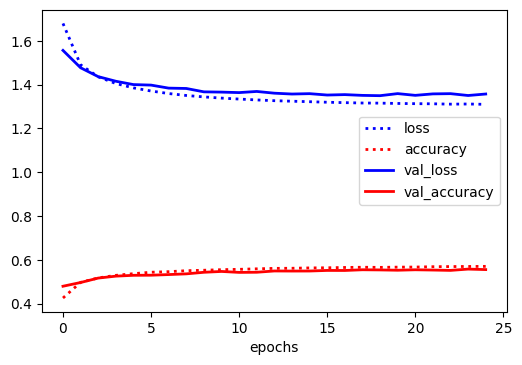

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_20 (Flatten)         (None, 512)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 10)                5130      
Total params: 14,719,818
Trainable params: 43,850
Non-trainable params: 14,675,968
_________________________________________________________________
None


def build_model_4_1():
    conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
    model_4_1 = models.Sequential()
    model_4_1.add(conv_base)
    model_4_1.add(layers.Flatten())
    conv_base.trainable = False
    for conv_layer in conv_base.layers[:10]:
        conv_layer.trainable = True
    model_4_1.add(layers.Dense(10, activation='softmax'))
    model_4_1.compile(optimizer= optimizers.RMSprop(lr= 0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model_4_1
    pass



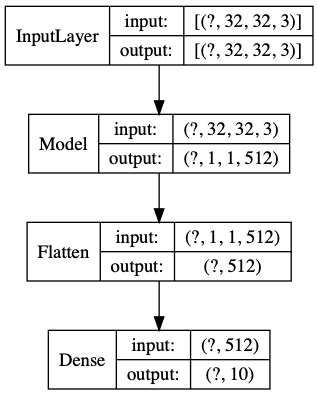

In [12]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100

print_answer(solution.answer_q_4_1)
run_evaluation("model_4_1", solution.build_model_4_1, solution.evaluation_split, solution.base_dir, 
               solution.target_dir, train=False)
%psource solution.build_model_4_1
if os.path.exists(os.path.join(solution.target_dir,'model_4_1.png')):
    display(Image(os.path.join(solution.target_dir,'model_4_1.png'), width=200))
#solution.build_model_4_1().layers[0].summary()

#### Answer 4.2, Embeddings (5p)
- Generate embeddings with the trained convolutional part of model_4_1 (without the dense layer)
- Embed the training and test data and store them to disk
- Build and evaluate a pipeline on the embedded data
    - Check if pipeline makes sense (e.g. use models that can handle many dimensions)
- Describe what you did and what you observed (max 800 chars).
    - Consider different models, preprocessing, tuning, etc.
    - Check performance (see original Submission.html) when in doubt. We did not run all the evaluations because it takes too long, and the output is ill-defined.

In [13]:
print_answer(solution.answer_q_4_2)
print(solution.generate_pipeline())
#print("Evaluation:",solution.evaluation_4_2(solution.X_train, solution.y_train, solution.X_test, solution.y_test))
%psource solution.store_embeddings
%psource solution.evaluation_4_2

Let's look closely how the store embedding function works. It first fetches all the intermediate layers. After that the embeddings of the test are called and the training data is generated. This data is then stored in the external file system. Meanwhile, using the 'decision tree classifier' a pipeline is generated. The embeddings of the training and testing data (i.e. X_test and X_train) are loaded with the help of helper functions. These values are passed to evaluate the ealier created pipeline. The accuracy score of pipeline after evaluation was not very good, which is because it's the accuracy score with outputs generated from intermediate layers.  (length: 660)

Pipeline(steps=[('classifier', DecisionTreeClassifier())])
def store_embeddings():
    """ Stores all necessary embeddings to file
    """
    n_model = models.Model(inputs= model_4_123.input, outputs= model_4_123.layers[2].output)
    X_train_embed = n_model.predict(X_train, batch_size=32)
    X_test_embed = n_model.predic

In [14]:
end_verify = time.time()
print("Running time: {:.2f} seconds".format(end_verify - start_verify))
print("Last modified: {}".format(solution.last_edit))
print("scikit-learn version: {0}".format(solution.sklearn_version))

with open(solution.grade_file, "a") as myfile:
    myfile.write(','.join(grades)+"\n")

Running time: 7.89 seconds
Last modified: May 26, 2020
scikit-learn version: 0.23.1
